In [34]:
import numpy as np
import matplotlib.pyplot as plt
import util

In [8]:
data = util.load_regular_sample_file('Data', 4, sparse_matrix=False)

In [9]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(4277, 30677)


Library Size
https://scrnaseq-course.cog.sanger.ac.uk/website/cleaning-the-expression-matrix.html

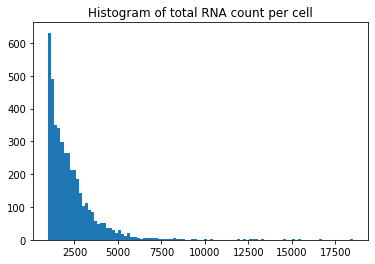

In [10]:
total_counts = np.sum(data, axis=1)
plt.hist(total_counts, bins=100)
plt.title('Histogram of total RNA count per cell')
plt.show()

In [11]:
min(total_counts)

1000.0

Detected genes

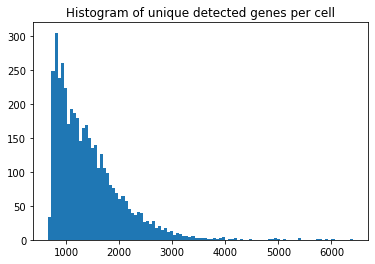

In [12]:
num_detected_genes = np.count_nonzero(data, axis=1)
plt.hist(num_detected_genes, bins=100)
plt.title('Histogram of unique detected genes per cell')
plt.show()

In [15]:
util.visualize_sample(data)

AttributeError: 'PCA' object has no attribute 'components'

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.components_.shape

(2, 30677)

Text(0.5, 1.0, 'First 2 PCA components')

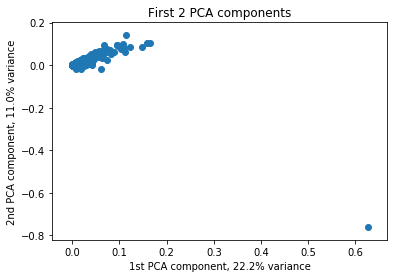

In [26]:
expl_var_1, expl_var_2 = pca.explained_variance_ratio_

plt.scatter(pca.components_[0,:], pca.components_[1,:])
plt.xlabel(f'1st PCA component, {100 * expl_var_1:.1f}% variance')
plt.ylabel(f'2nd PCA component, {100 * expl_var_2:.1f}% variance')
plt.title('First 2 PCA components')

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

In [37]:
data = np.load('04hpf.npy', allow_pickle=True)
type(data)

numpy.ndarray

In [36]:
gene_names = util.load_gene_names('Data', 4)

AttributeError: module 'util' has no attribute 'load_gene_names'

In [38]:
lda = LatentDirichletAllocation(n_components=3)
lda.fit(data)

TypeError: float() argument must be a string or a number, not 'dok_matrix'

In [31]:
lda.components_.shape

(3, 30677)

In [33]:
top_genes = np.argsort(lda.components_, axis=1)
for i in range(3):
    print(f'Topic #{i}:')
    top_five = top_genes[i,-5:]
    print(' '.join())

Topic #0:
[16408 14145 16132 12579 16579]
Topic #1:
[16132 16579 12579  2516 29780]
Topic #2:
[17333 29780 12579 14145 16406]
